In [1]:
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras    
from tensorflow.keras.layers import Flatten   
from tensorflow.keras.layers import Dense, Dropout
import numpy as np
import pandas as pd
import pickle
# Import LabelEncoder
from sklearn import preprocessing
# Library untuk feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Import train_test_split function
from sklearn.model_selection import train_test_split
# Library untuk algoritma klasifikasi KNN
from sklearn.neighbors import KNeighborsClassifier
#Import scikit-learn metrics module for accuracy calculation
#from sklearn import metrics

drive.mount("/content/drive")
path = "/content/drive/MyDrive/Capstone/exercise_datasetV2.csv"
df = pd.read_csv(path)
print(df.head())
banyak_kategori = len(df.index)


Mounted at /content/drive
  Activity, Exercise or Sport (1 hour) Intensity Description  \
0          Cycling, mountain bike, bmx                   NaN   
1  Cycling, <10 mph, leisure bicycling                   NaN   
2             Cycling, >20 mph, racing                   NaN   
3          Cycling, 10-11.9 mph, light                   NaN   
4       Cycling, 12-13.9 mph, moderate                   NaN   

   Duration (minutes)  Calories per kg  
0                  60         1.750730  
1                  60         0.823236  
2                  60         3.294974  
3                  60         1.234853  
4                  60         1.647825  


In [2]:
list_berat = []
for i in range(len(df.index)):
  list_berat.append(1)

df['berat'] =  list_berat
dict_df = {'Activity, Exercise or Sport (1 hour)' : [], 'Duration (minutes)': [], 'Calories per kg': [], 'berat' : []}
df_new = df
for index, row in df.iterrows():
  print(index)
  menit = row['Duration (minutes)']
  activity = row['Activity, Exercise or Sport (1 hour)']
  calories = row['Calories per kg']
  for i in range(1,menit):
    for j in range(2,101):
      new_calories = calories*1.0/60*i*j
      list_activity = dict_df.get('Activity, Exercise or Sport (1 hour)')
      list_duration = dict_df.get('Duration (minutes)')
      list_calories = dict_df.get('Calories per kg')
      list_berat = dict_df.get('berat')
      list_activity.append(activity)
      list_duration.append(i)
      list_calories.append(new_calories)
      list_berat.append(j)
      #new_row = pd.DataFrame({'Activity, Exercise or Sport (1 hour)' : [activity], 'Duration (minutes)': [i], 'Calories per kg': [new_calories], 'berat' : [j]})
      
df_curr = pd.DataFrame(dict_df)   
df_new = pd.concat([df_curr, df_new.loc[:]]).reset_index(drop=True)
#df2 = pd.concat([new_row,df.loc[:]]).reset_index(drop=True)
print(df_new.head())
print(df_new.tail())

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
  Activity, Exercise or Sport (1 hour)  Duration (minutes)  Calories per kg  \
0          Cycling, mountain bike, bmx 

In [3]:
print(len(df_new.index))
print(df_new.describe())
print(df_new.dtypes)
df_new.rename(columns = {'Activity, Exercise or Sport (1 hour)':'activity', 'Duration (minutes)' : 'durasi' , 'Calories per kg' : 'calories' }, inplace = True)
print(df_new.head())

1448816
       Duration (minutes)  Calories per kg         berat
count        1.448816e+06     1.448816e+06  1.448816e+06
mean         3.000514e+01     3.467251e+01  5.099144e+01
std          1.703246e+01     3.748635e+01  2.858243e+01
min          1.000000e+00     1.033558e-02  1.000000e+00
25%          1.500000e+01     8.237434e+00  2.600000e+01
50%          3.000000e+01     2.219663e+01  5.100000e+01
75%          4.500000e+01     4.774767e+01  7.600000e+01
max          6.000000e+01     3.644815e+02  1.000000e+02
Activity, Exercise or Sport (1 hour)     object
Duration (minutes)                        int64
Calories per kg                         float64
berat                                     int64
Intensity Description                    object
dtype: object
                      activity  durasi  calories  berat Intensity Description
0  Cycling, mountain bike, bmx       1  0.058358      2                   NaN
1  Cycling, mountain bike, bmx       1  0.087536      3              

In [4]:
target = df['Activity, Exercise or Sport (1 hour)']
print(df_new.head())
numeric_feature_names = ['durasi', 'calories', 'berat']
numeric_features = df_new[numeric_feature_names]
numeric_features.head()

                      activity  durasi  calories  berat Intensity Description
0  Cycling, mountain bike, bmx       1  0.058358      2                   NaN
1  Cycling, mountain bike, bmx       1  0.087536      3                   NaN
2  Cycling, mountain bike, bmx       1  0.116715      4                   NaN
3  Cycling, mountain bike, bmx       1  0.145894      5                   NaN
4  Cycling, mountain bike, bmx       1  0.175073      6                   NaN


,durasi,calories,berat
0,1,0.058358,2
1,1,0.087536,3
2,1,0.116715,4
3,1,0.145894,5
4,1,0.175073,6


In [5]:
jumlah_class = len(df_new['activity'].value_counts())
print(jumlah_class)

248


In [6]:
df_new['activity'] = df_new['activity'].astype('category')
df_new['activity_category'] = df_new['activity'].cat.codes.astype('category')
print(df_new.head())

                      activity  durasi  calories  berat Intensity Description  \
0  Cycling, mountain bike, bmx       1  0.058358      2                   NaN   
1  Cycling, mountain bike, bmx       1  0.087536      3                   NaN   
2  Cycling, mountain bike, bmx       1  0.116715      4                   NaN   
3  Cycling, mountain bike, bmx       1  0.145894      5                   NaN   
4  Cycling, mountain bike, bmx       1  0.175073      6                   NaN   

  activity_category  
0                61  
1                61  
2                61  
3                61  
4                61  


In [7]:
df_new_2 = df_new.drop(columns = ['activity', 'Intensity Description'])

In [8]:
df_new_2['durasi'] = MinMaxScaler().fit_transform(np.array(df_new_2['durasi']).reshape(-1,1))
df_new_2['calories'] = MinMaxScaler().fit_transform(np.array(df_new_2['calories']).reshape(-1,1))
df_new_2['berat'] = MinMaxScaler().fit_transform(np.array(df_new_2['berat']).reshape(-1,1))

In [9]:
df_fitur = df_new_2[['durasi', 'calories', 'berat']]
fitur_np = np.array(df_fitur.values)

In [10]:
label_np = np.array(df_new['activity_category'].values)

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(fitur_np, label_np, test_size=0.3) 

In [12]:
listPrecision = []
listAccuracy = []
listRecall = []
listF1_score = []
listSupport = []

In [13]:
kNN_model = KNeighborsClassifier(n_neighbors=3)
kNN_model.fit(X_train, Y_train)
Y_pred = kNN_model.predict(X_test)
activity_classes = df_new.activity.unique()

In [14]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred, target_names = activity_classes))
report = classification_report(Y_test, Y_pred, output_dict=True, target_names = activity_classes )

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                           precision    recall  f1-score   support

              Cycling, mountain bike, bmx       0.00      0.01      0.00      1726
      Cycling, <10 mph, leisure bicycling       0.00      0.00      0.00      1767
                 Cycling, >20 mph, racing       0.00      0.00      0.00      1802
              Cycling, 10-11.9 mph, light       0.05      0.08      0.06      1762
           Cycling, 12-13.9 mph, moderate       0.00      0.00      0.00      1795
           Cycling, 14-15.9 mph, vigorous       0.00      0.00      0.00      1749
    Cycling, 16-19 mph, very fast, racing       0.00      0.00      0.00      1698
                               Unicycling       0.00      0.00      0.00      1767
           Stationary cycling, very light       0.00      0.00      0.00      1824
                Stationary cycling, light       0.01      0.02      0.01      1801
             Stationary cycling, moderate       0.00      0.00      0.00      1789
   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
#!pip install ipython==7.10.0
import warnings
warnings.filterwarnings('always')
for i in range(100,201):
  
  kNN_model = KNeighborsClassifier(n_neighbors=i)
  kNN_model.fit(X_train, Y_train)
  Y_pred = kNN_model.predict(X_test)
  activity_classes = df_new.activity.unique()
  report = classification_report(Y_test, Y_pred, output_dict=True, target_names = activity_classes, zero_division=1)
  
  precision = report['macro avg']['precision'] 
  listPrecision.append(precision)

  accuracy = report['accuracy'] 
  listAccuracy.append(accuracy)

  recall = report['macro avg']['recall'] 
  listRecall.append(recall)

  f1_score = report['macro avg']['f1-score'] 
  listF1_score.append(f1_score)

  support = report['macro avg']['support'] 
  listSupport.append(support)

In [16]:
print(len(listPrecision))
print(len(listAccuracy))
print(len(listRecall))
print(len(listF1_score))
print(len(listSupport))

101
101
101
101
101


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
idx = [*range(100,201,1)]
print(idx)
df_report = pd.DataFrame(list(zip(listPrecision, listAccuracy, listRecall, listF1_score, listSupport)),
               columns =['precision', 'accuracy', 'recall', 'f1_score', 'support'], index = idx)

[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:

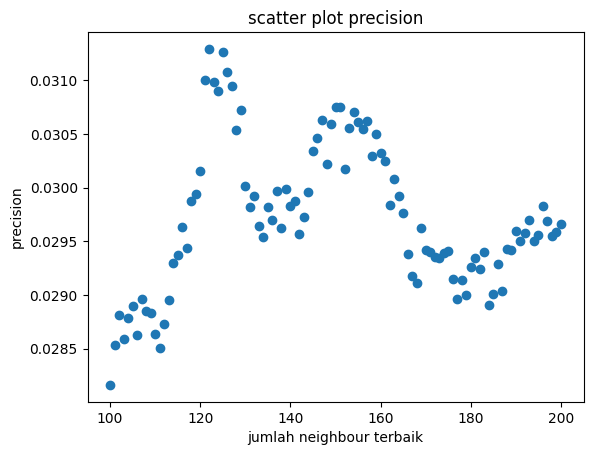

In [19]:
import matplotlib.pyplot as plt
plt.scatter(idx,df_report['precision'])
plt.title("scatter plot precision")
plt.xlabel("jumlah neighbour terbaik")
plt.ylabel("precision")
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


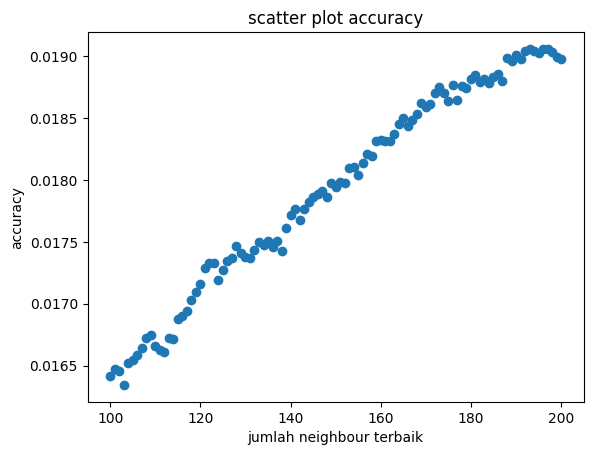

In [20]:
import matplotlib.pyplot as plt
plt.scatter(idx,df_report['accuracy'])
plt.title("scatter plot accuracy")
plt.xlabel("jumlah neighbour terbaik")
plt.ylabel("accuracy")
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


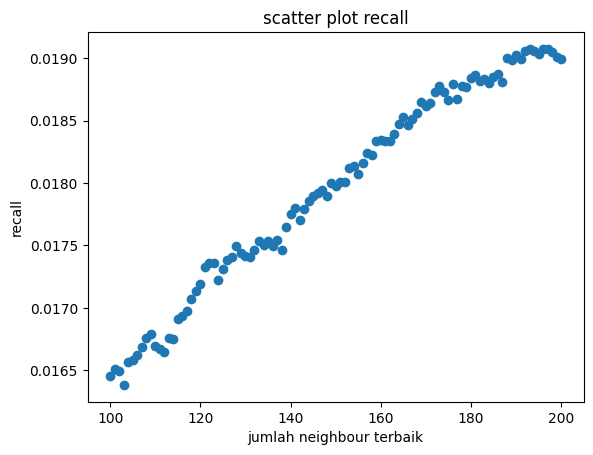

In [21]:
import matplotlib.pyplot as plt
plt.scatter(idx,df_report['recall'])
plt.title("scatter plot recall")
plt.xlabel("jumlah neighbour terbaik")
plt.ylabel("recall")
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


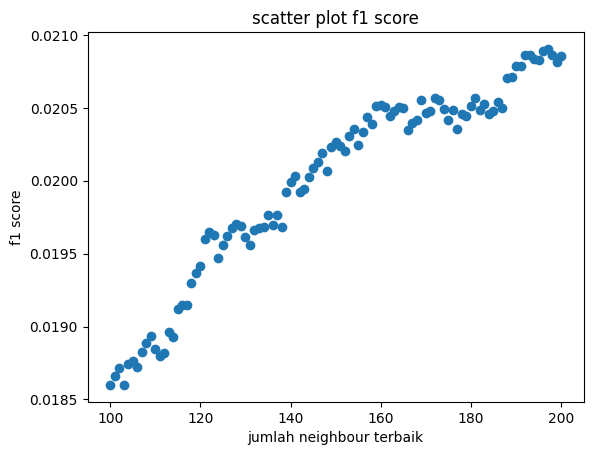

In [22]:
import matplotlib.pyplot as plt
plt.scatter(idx,df_report['f1_score'])
plt.title("scatter plot f1 score")
plt.xlabel("jumlah neighbour terbaik")
plt.ylabel("f1 score")
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


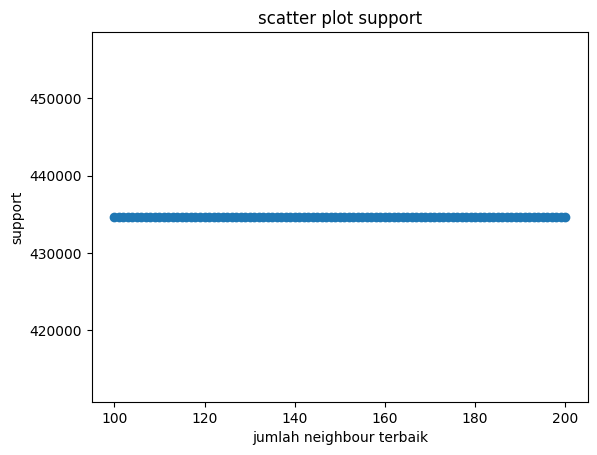

In [23]:

import matplotlib.pyplot as plt
plt.scatter(idx,df_report['support'])
plt.title("scatter plot support")
plt.xlabel("jumlah neighbour terbaik")
plt.ylabel("support")
plt.show()

In [ ]:
def plot_accuracy(history):
    
    plt.plot(history.history['accuracy'],label='train accuracy')
    plt.plot(history.history['val_accuracy'],label='validation accuracy')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.savefig('Accuracy_v1_model_inceptionv3')
    plt.show()
    
def plot_loss(history):
    
    plt.plot(history.history['loss'],label="train loss")
    plt.plot(history.history['val_loss'],label="validation loss")
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.savefig('Loss_v1_model_inceptionv3')
    plt.show()
    
plot_accuracy(model_fit)
plot_loss(model_fit)

In [ ]:
model.save('/content/drive/MyDrive/Capstone/model_exercise.h5')
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('/content/drive/MyDrive/Capstone/model_exercise.tflite', 'wb') as f:
  f.write(tflite_model)